# PLSR

# Imports

In [2]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Método Jackknife

In [3]:
def jackknife_pls(X, Y, max_components=10, cv=5):
    scores = []
    
    for n in range(1, max_components + 1):
        pls = PLSRegression(n_components=n)
        mse = -np.mean(cross_val_score(pls, X, Y, cv=cv, scoring='neg_mean_squared_error'))
        scores.append(mse)
    
    return np.argmin(scores) + 1  # Retorna o número de componentes com menor erro

# Plot and save

In [4]:
dataset_save = r"C:\Users\luyza\OneDrive\Documentos\spectroscopy_machine_learning_analysis\Partial Least Squares Regression"
dataset_saved = r"C:\Users\luyza\OneDrive\Documentos\spectroscopy_machine_learning_analysis\Processed\PCA"


In [5]:
def plot_pred_vs_ref(Y_true, Y_pred, Y_opt, attribute, filter):
    
    slope_pred, offset_pred = np.polyfit(Y_true, Y_pred, 1)
    rmse_pred = np.sqrt(mean_squared_error(Y_true, Y_pred))
    r2_pred = r2_score(Y_true, Y_pred)
    
    slope_opt, offset_opt = np.polyfit(Y_true, Y_opt, 1)
    rmse_opt = np.sqrt(mean_squared_error(Y_true, Y_opt))
    r2_opt = r2_score(Y_true, Y_opt)
    
    metrics_dict = pd.DataFrame({
    'Y': ['Referência', 'CV'],
    'R²': [r2_opt, r2_pred],
    'RMSE': [rmse_opt, rmse_pred],
    'Offset': [offset_opt, offset_pred],
    'Slope': [slope_opt,slope_pred]
    })
    
    plt.figure(figsize=(10, 6))

    plt.scatter(Y_true, Y_opt, color='blue', label='Reference', marker='o', alpha=0.7)

    plt.scatter(Y_true, Y_pred, color='red', label='Predicted', marker='o', alpha=0.7)
       
    plt.xlabel("Reference")
    plt.ylabel("Predicted (CV)")
    plt.title(f"{filter + " - " + attribute}: Reference vs. Predicted (CV)")
    plt.grid(True)
    plt.text(0.05, 0.95, f'Reference - Slope: {slope_opt:.2f}, Offset: {offset_opt:.2f}, RMSE: {rmse_opt:.2f}, R²: {r2_opt:.2f}\nPredicted - Slope: {slope_pred:.2f}, Offset: {offset_pred:.2f}, RMSE: {rmse_pred:.2f}, R²: {r2_pred:.2f}',
             transform=plt.gca().transAxes, fontsize=12, verticalalignment='top', horizontalalignment='left')
    plt.show()
    
    return metrics_dict

def pred_plot(Y_predict):
    X = Y_predict['Y_pred_valid'].values.reshape(-1, 1)
    y = Y_predict['Y_valid'].values

    model = LinearRegression().fit(X, y)
    slope = model.coef_[0]
    offset = model.intercept_

    # Criar pontos para a linha de regressão
    X_line = np.array([[Y_predict['Y_pred_valid'].min()], [Y_predict['Y_pred_valid'].max()]])
    y_pred_line = model.predict(X_line)

    r2 = r2_score(y, Y_predict['Y_pred_valid'])
    rmse = np.sqrt(mean_squared_error(y, Y_predict['Y_pred_valid']))

    plt.figure(figsize=(10, 6))
    plt.scatter(Y_predict['Y_pred_valid'], y, color='green', label='Dados')
    plt.plot(X_line, y_pred_line, color='blue', linestyle='--', label='Linha de Regressão')

    plt.xlabel('Predito')
    plt.ylabel('Real')
    plt.title('Predições no Conjunto de Teste')
    plt.legend()
    plt.text(0.05, 0.95, f'Slope: {slope:.2f}\nOffset: {offset:.2f}\nR²: {r2:.2f}\nRMSE: {rmse:.2f}', 
            transform=plt.gca().transAxes, verticalalignment='top')
    plt.legend(loc='lower right')
    plt.tight_layout()
    plt.show()
    
    metrics_dict = pd.DataFrame({
    'Y': ['Validação'],
    'R²': [r2],
    'RMSE': [rmse],
    'Offset': [offset],
    'Slope': [slope]
    })
    
    return metrics_dict

In [6]:
plot_infos_msc = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])
plot_infos_snv = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])
plot_infos_sg = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])

def add_plot_infos(plot_infos_pre, plot_infos_df, attribute):
    if plot_infos_pre.empty:
        plot_infos_df['Attribute'] = attribute
        return plot_infos_df.copy()
    
    plot_infos_df = plot_infos_df.copy()
    plot_infos_df['Attribute'] = attribute

    plot_infos_pre = pd.concat([plot_infos_pre, plot_infos_df], ignore_index=True)

    return plot_infos_pre


# Main

In [7]:
target_variables = ["SST", "PH", "UBS (%)", "FIRMEZA (N)", "AT"]

plot_infos_msc = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])
plot_infos_snv = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])
plot_infos_sg = pd.DataFrame(columns=['Attribute', 'Y', 'R²', 'RMSE','Offset','Slope'])

-------------------------------------> MSC <-------------------------------------
-------------------------------------> MSC - SST <-------------------------------------
Número ótimo de componentes para SST: 10


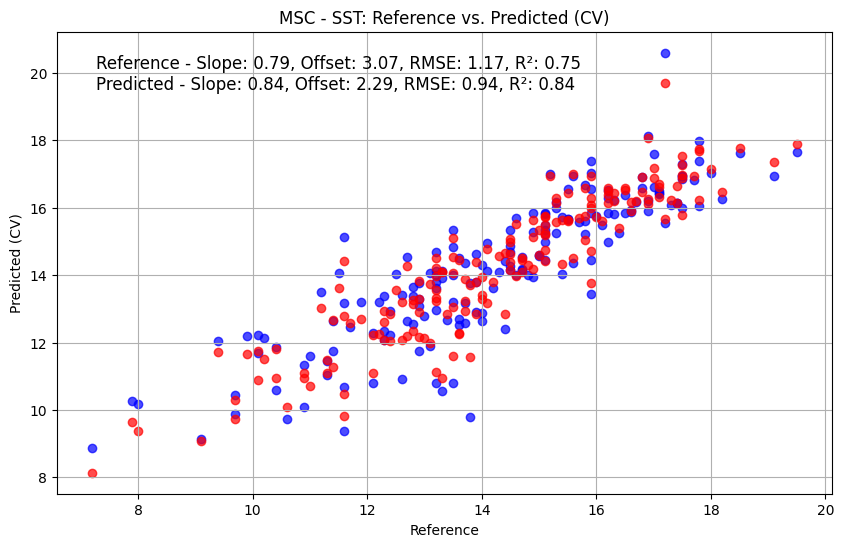

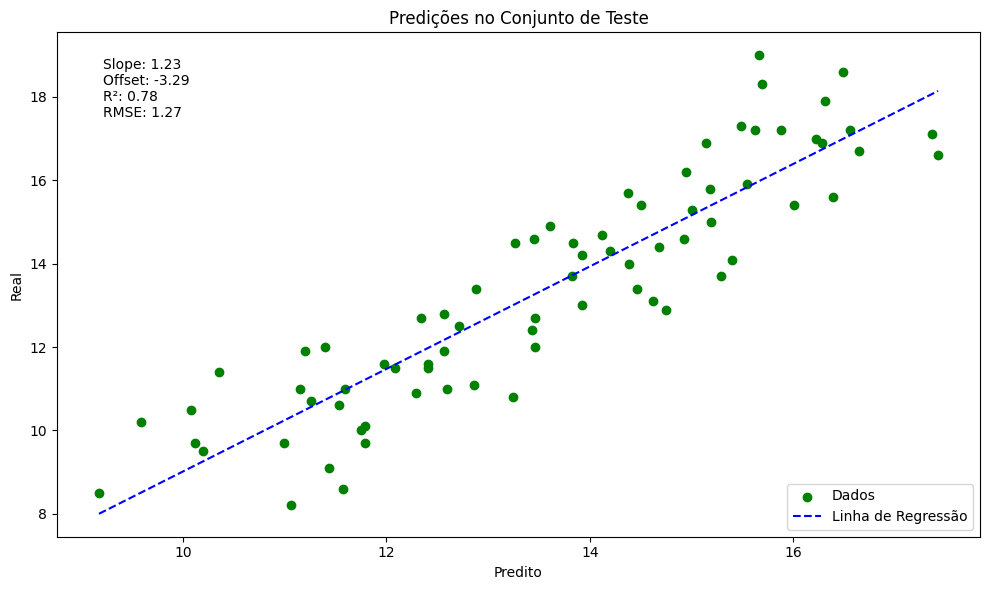

-------------------------------------> MSC - PH <-------------------------------------
Número ótimo de componentes para PH: 7


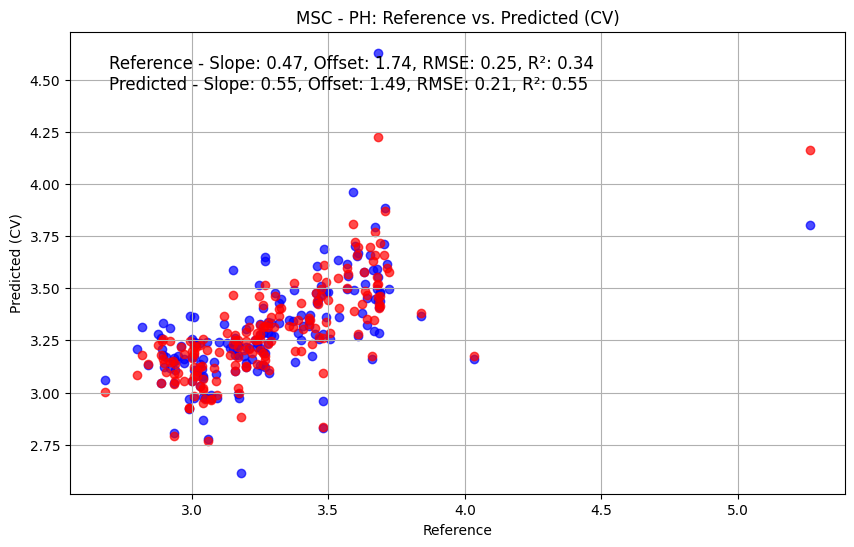

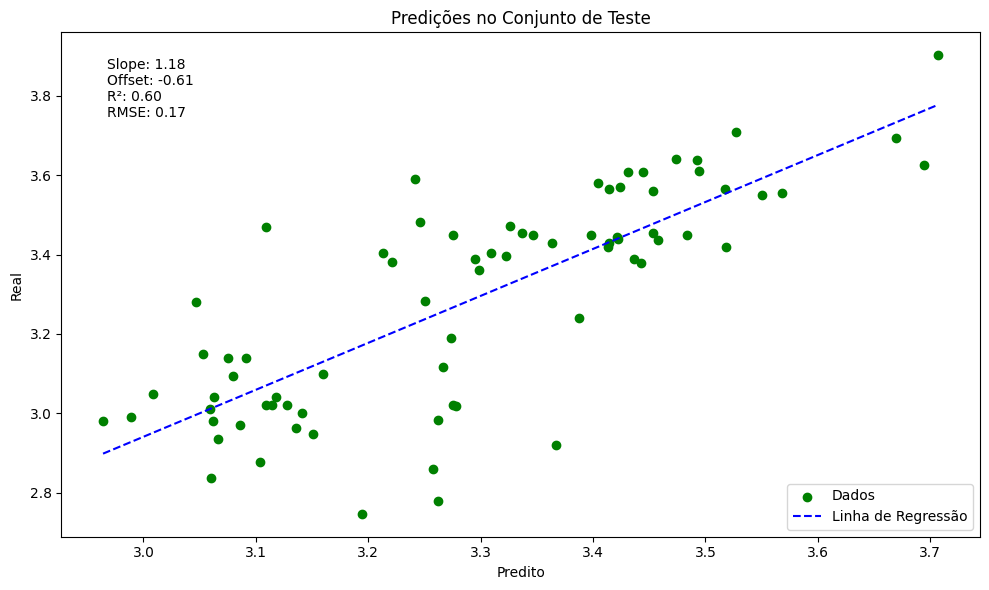

-------------------------------------> MSC - UBS (%) <-------------------------------------
Número ótimo de componentes para UBS (%): 10


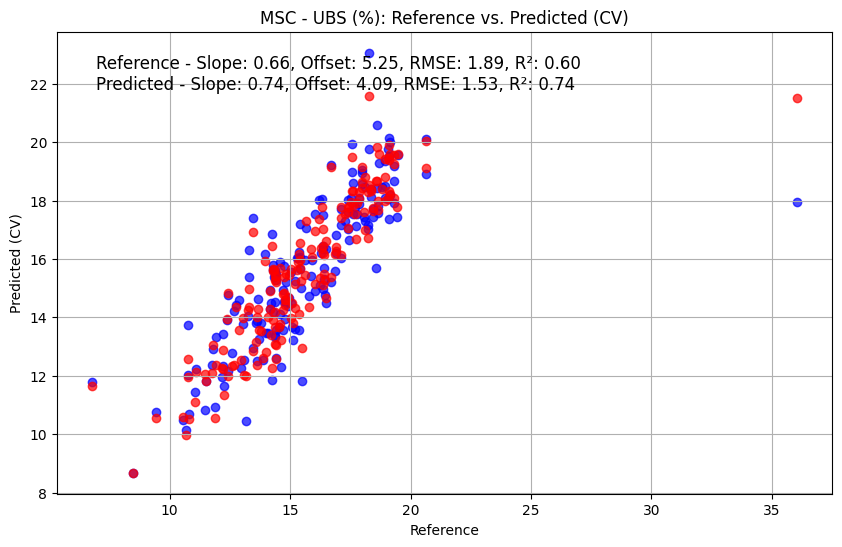

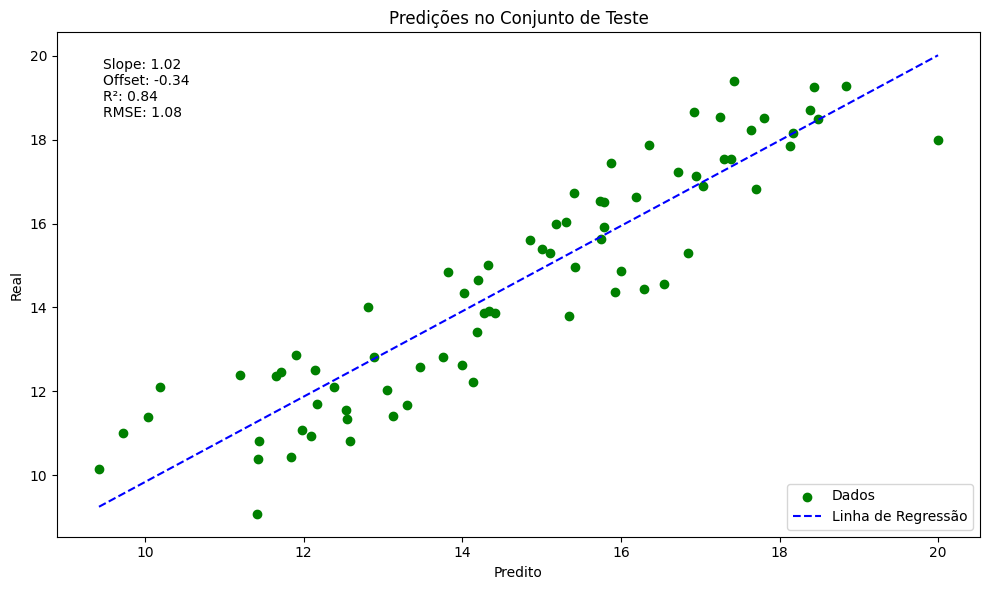

-------------------------------------> MSC - FIRMEZA (N) <-------------------------------------
Número ótimo de componentes para FIRMEZA (N): 7


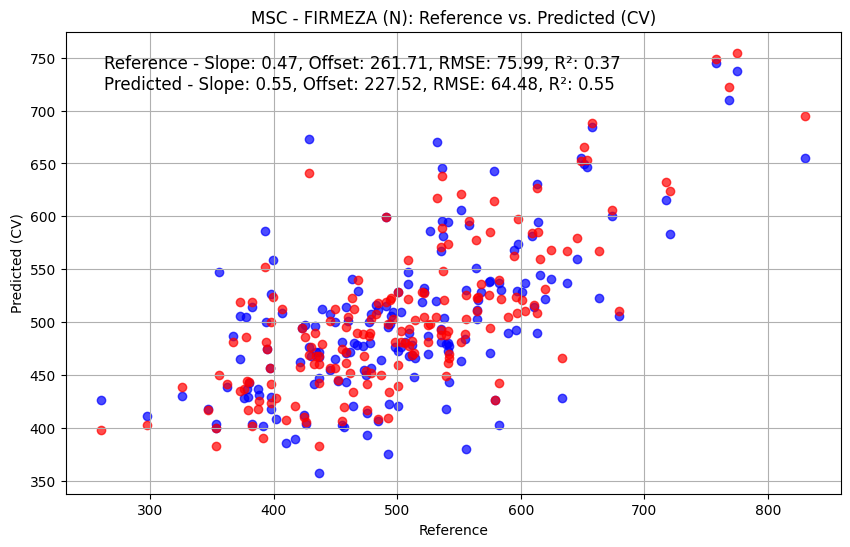

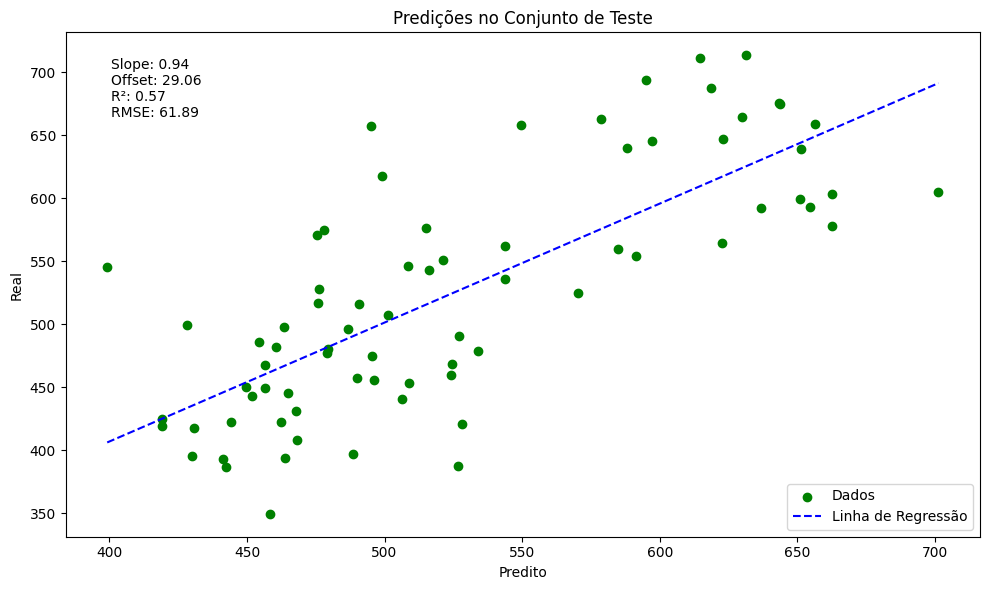

-------------------------------------> MSC - AT <-------------------------------------
Número ótimo de componentes para AT: 10


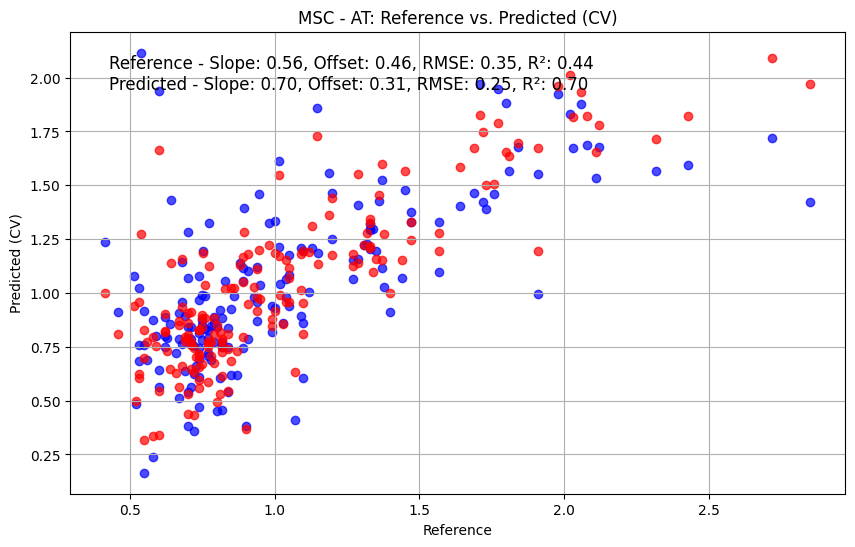

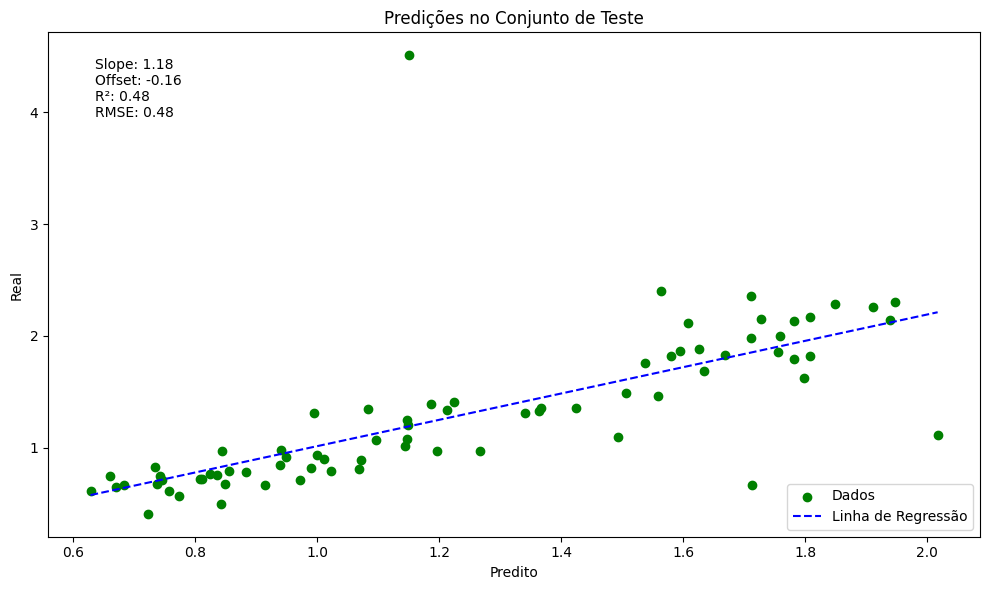

-------------------------------------> SNV <-------------------------------------
-------------------------------------> SNV - SST <-------------------------------------
Número ótimo de componentes para SST: 10


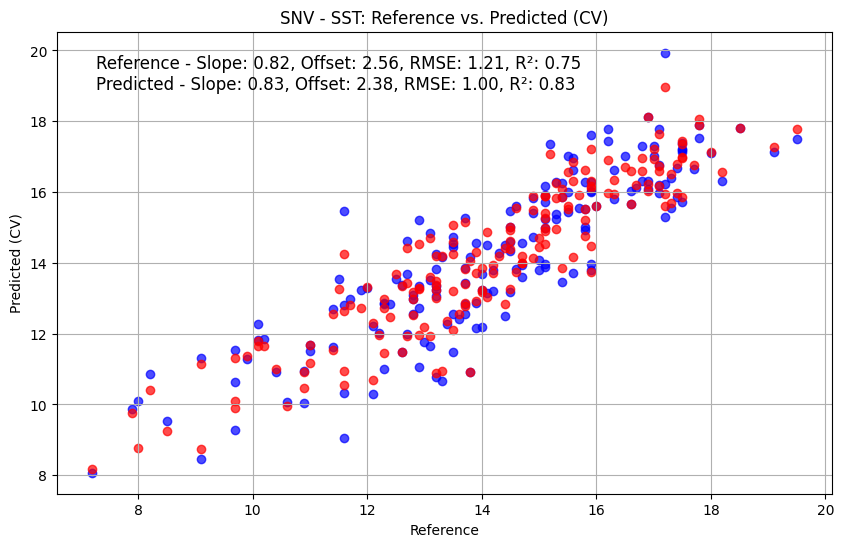

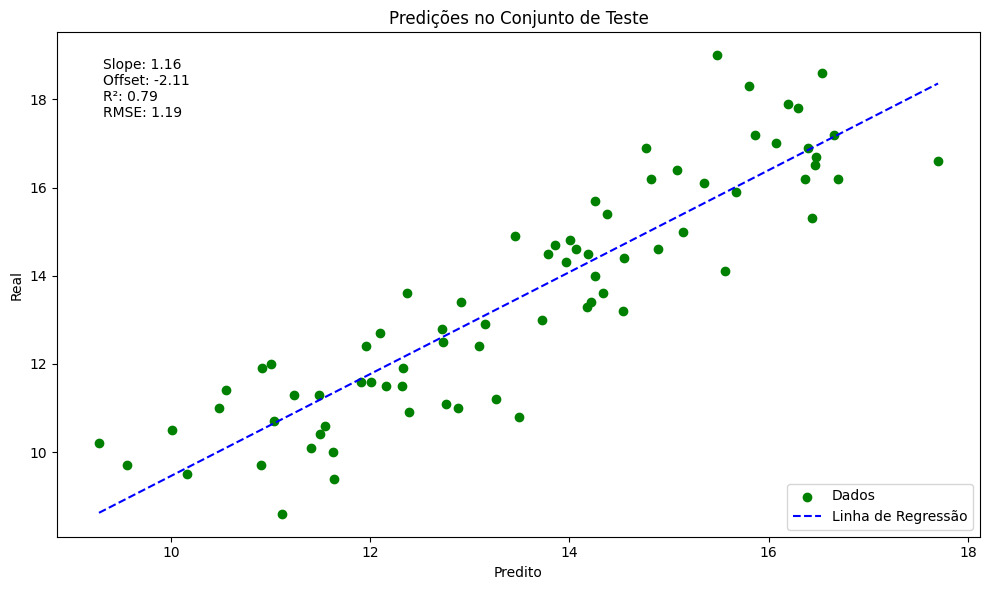

-------------------------------------> SNV - PH <-------------------------------------
Número ótimo de componentes para PH: 8


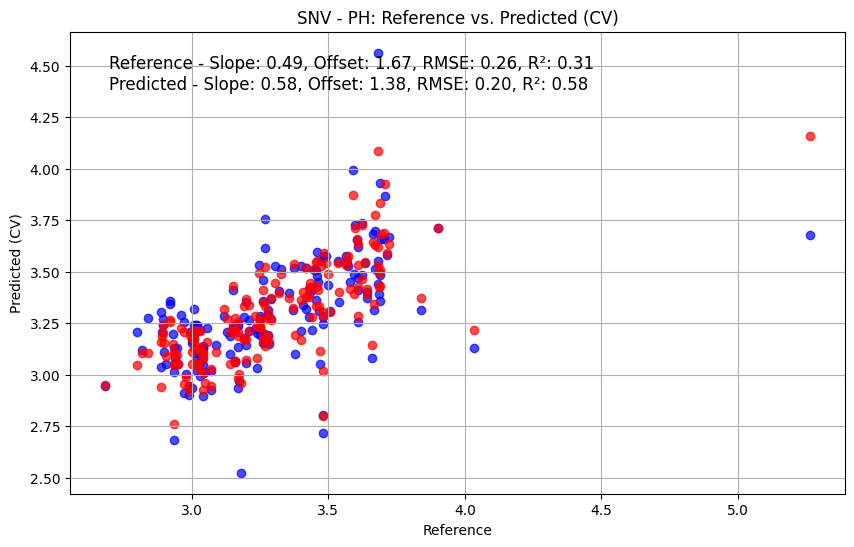

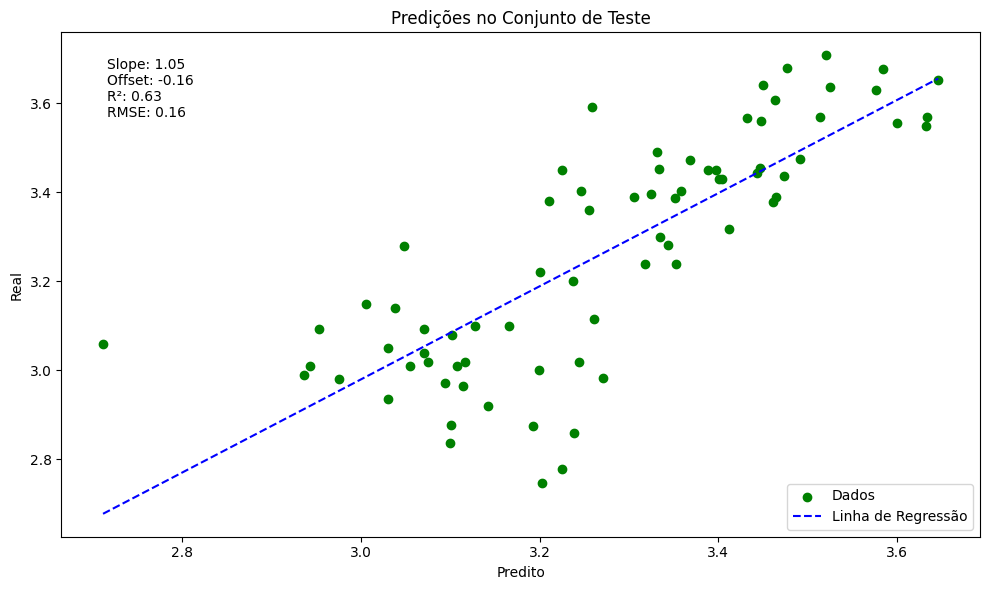

-------------------------------------> SNV - UBS (%) <-------------------------------------
Número ótimo de componentes para UBS (%): 10


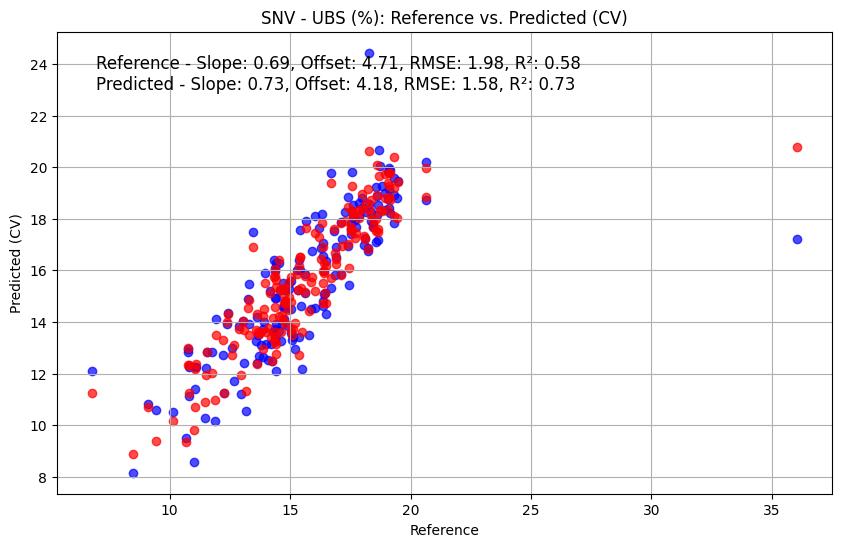

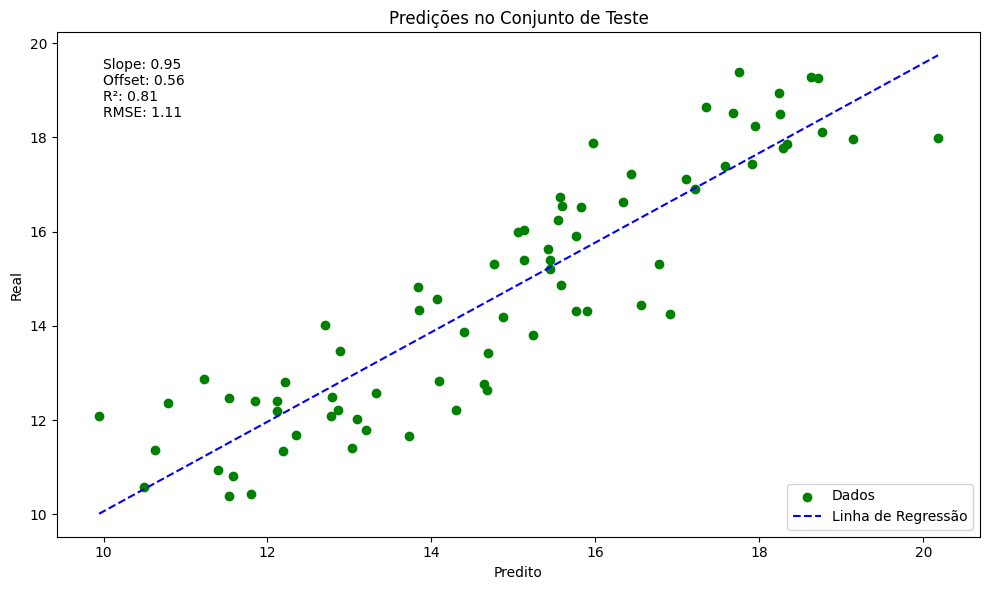

-------------------------------------> SNV - FIRMEZA (N) <-------------------------------------
Número ótimo de componentes para FIRMEZA (N): 7


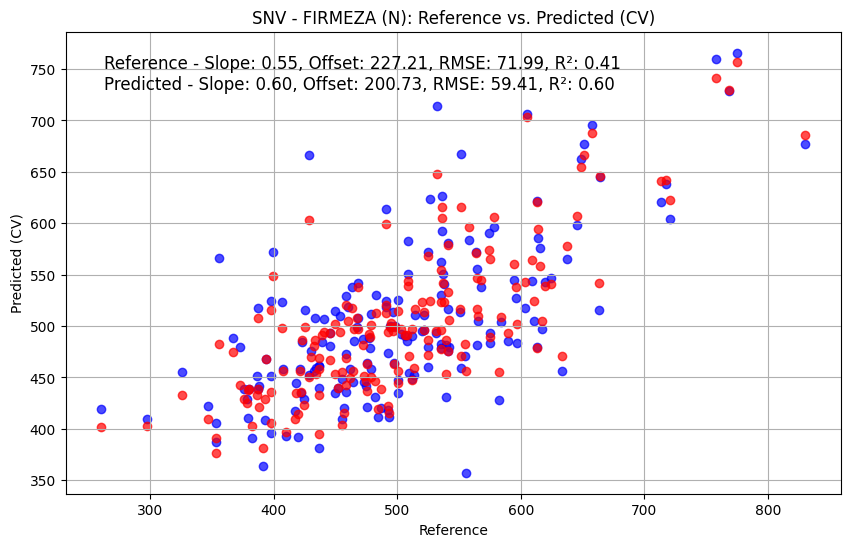

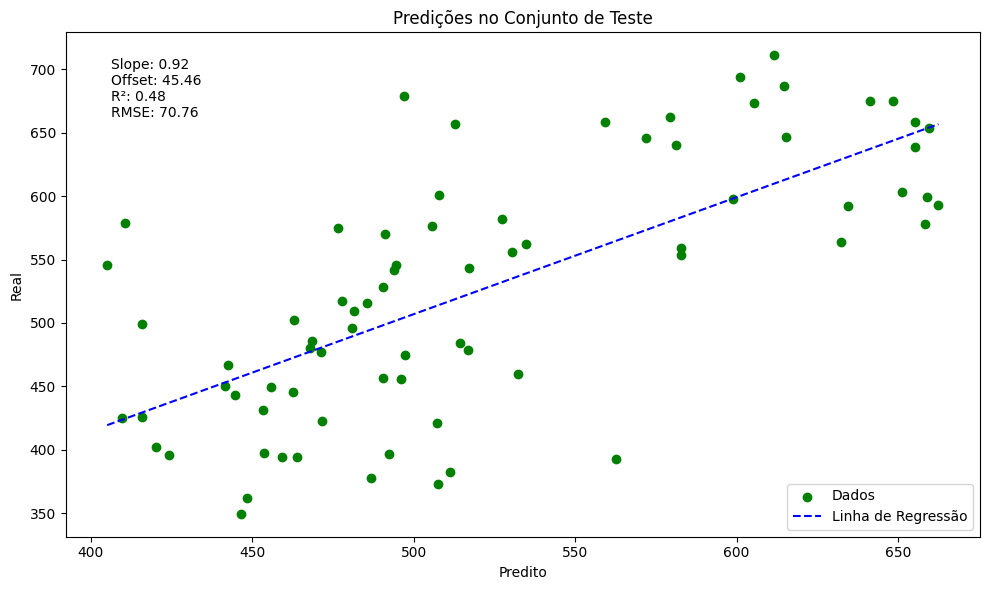

-------------------------------------> SNV - AT <-------------------------------------
Número ótimo de componentes para AT: 4


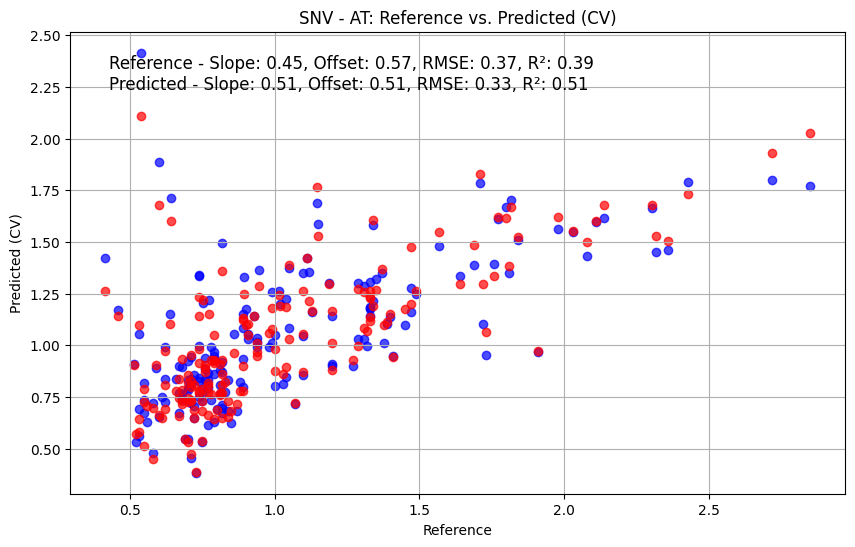

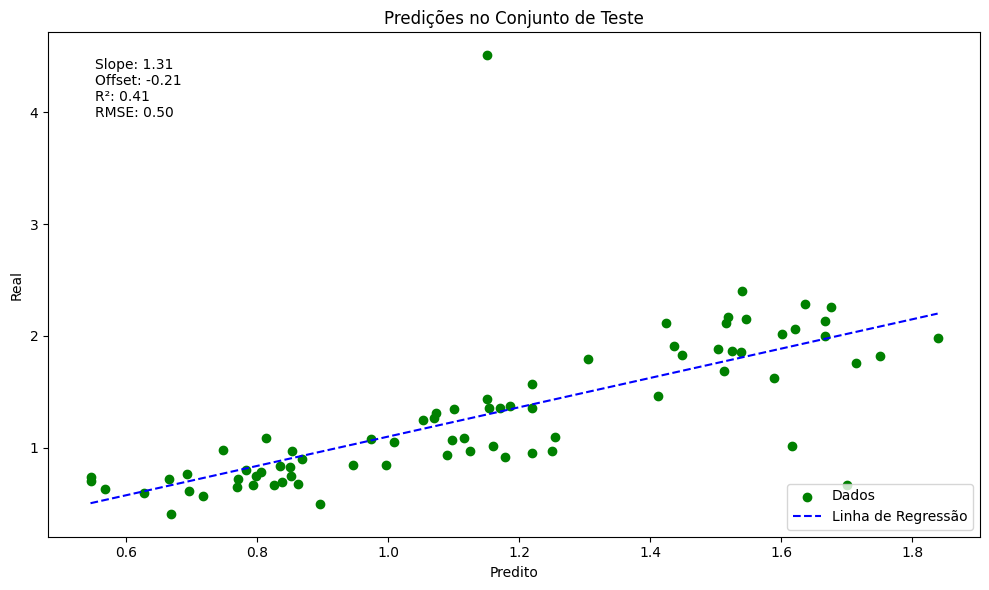

-------------------------------------> SG <-------------------------------------
-------------------------------------> SG - SST <-------------------------------------
Número ótimo de componentes para SST: 9


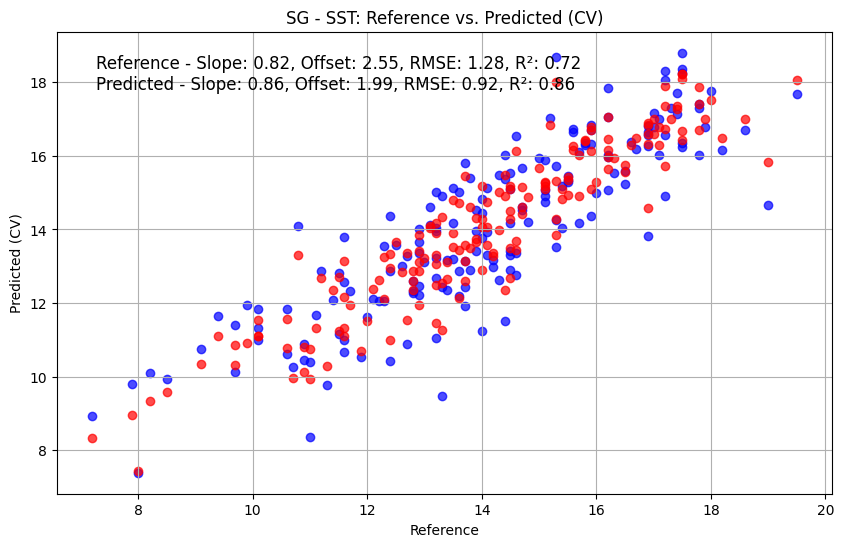

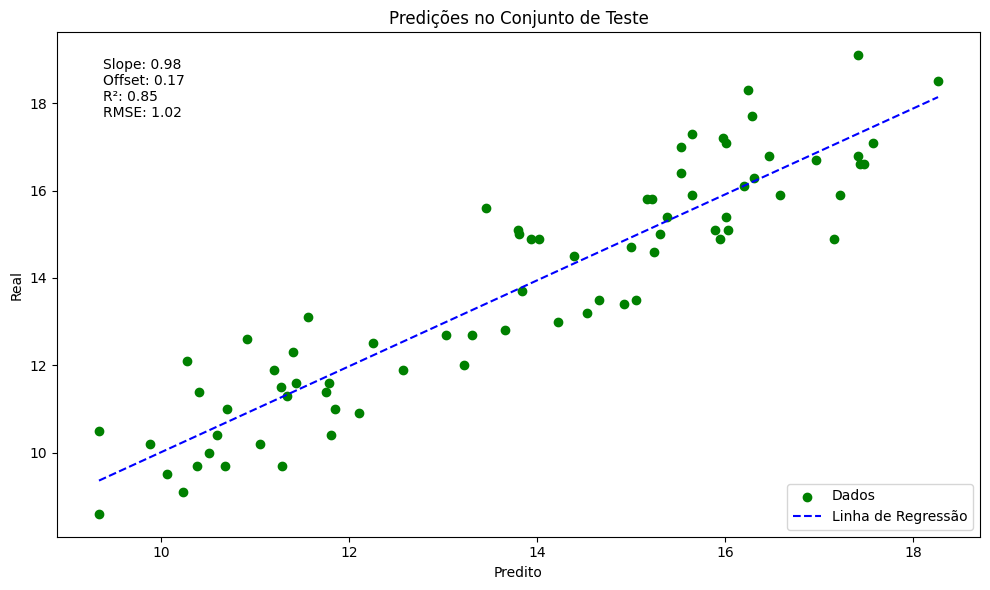

-------------------------------------> SG - PH <-------------------------------------
Número ótimo de componentes para PH: 5


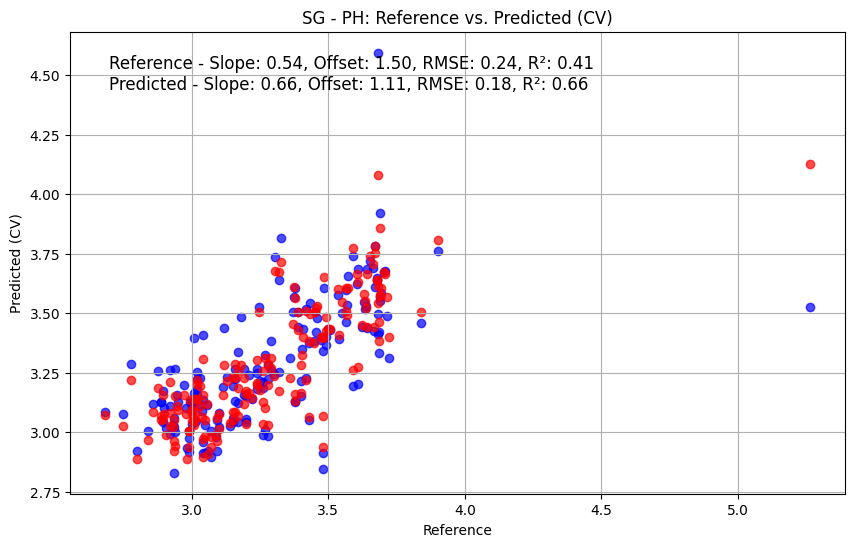

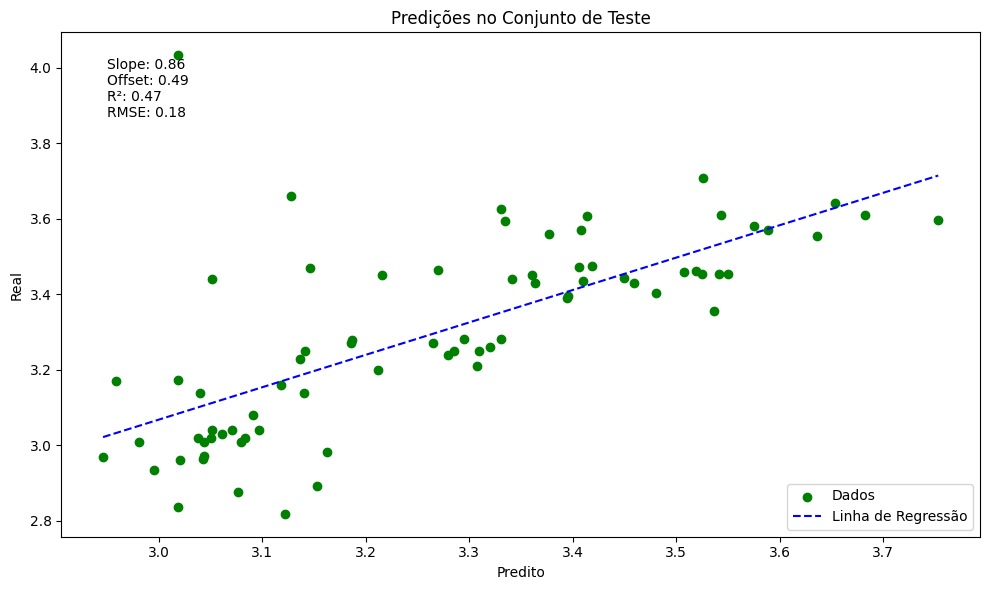

-------------------------------------> SG - UBS (%) <-------------------------------------
Número ótimo de componentes para UBS (%): 9


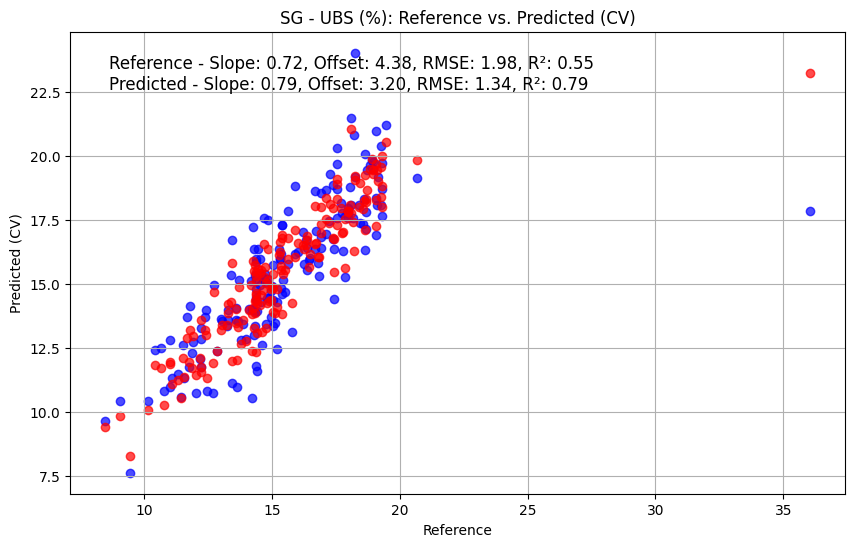

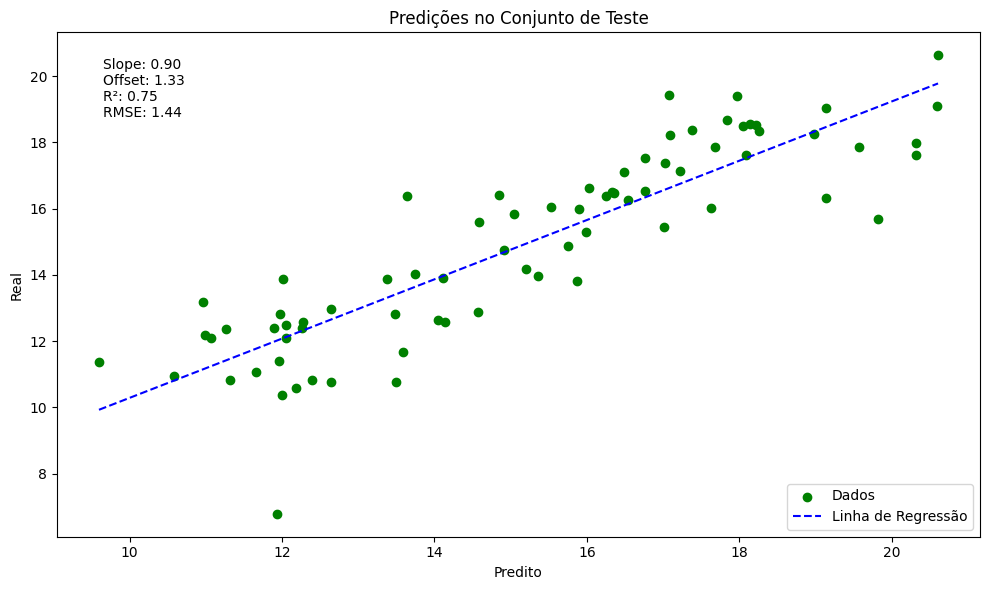

-------------------------------------> SG - FIRMEZA (N) <-------------------------------------
Número ótimo de componentes para FIRMEZA (N): 6


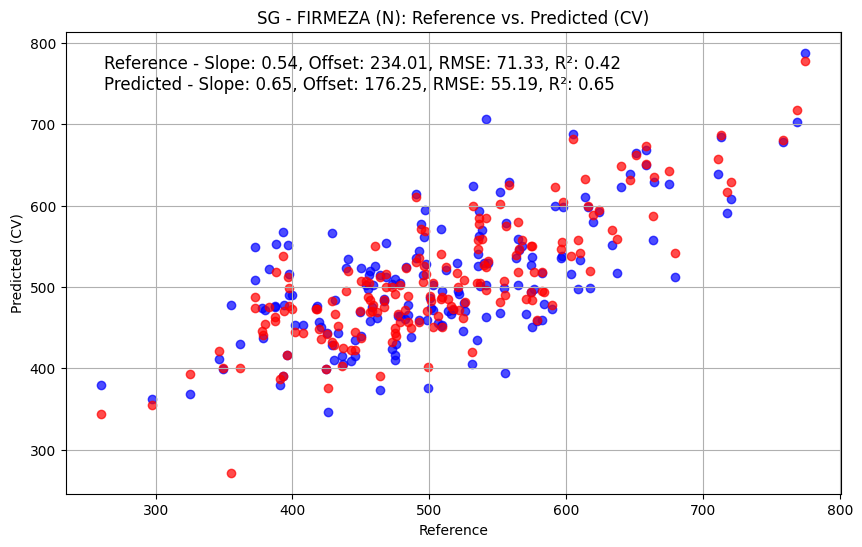

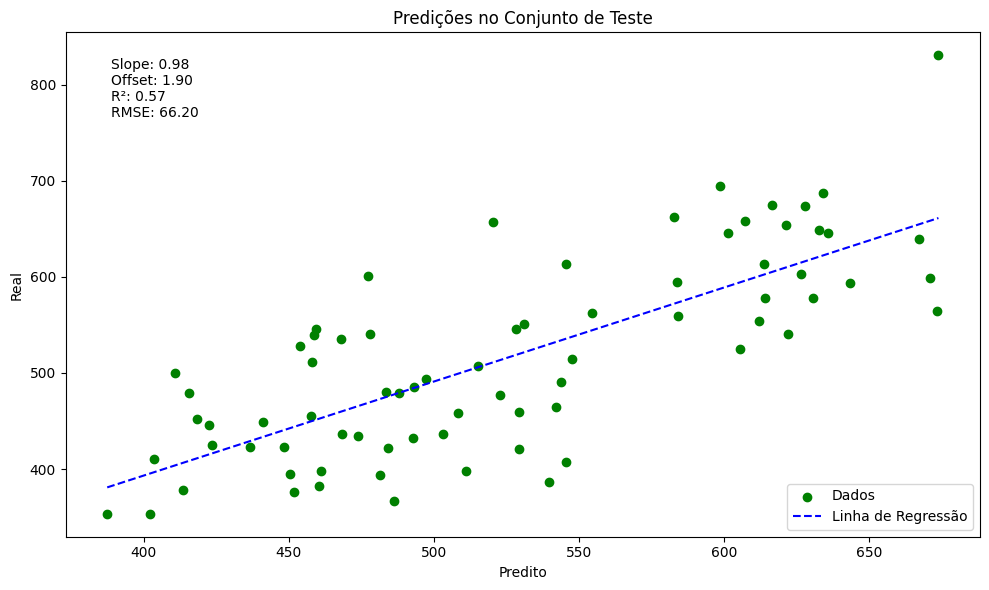

-------------------------------------> SG - AT <-------------------------------------
Número ótimo de componentes para AT: 6


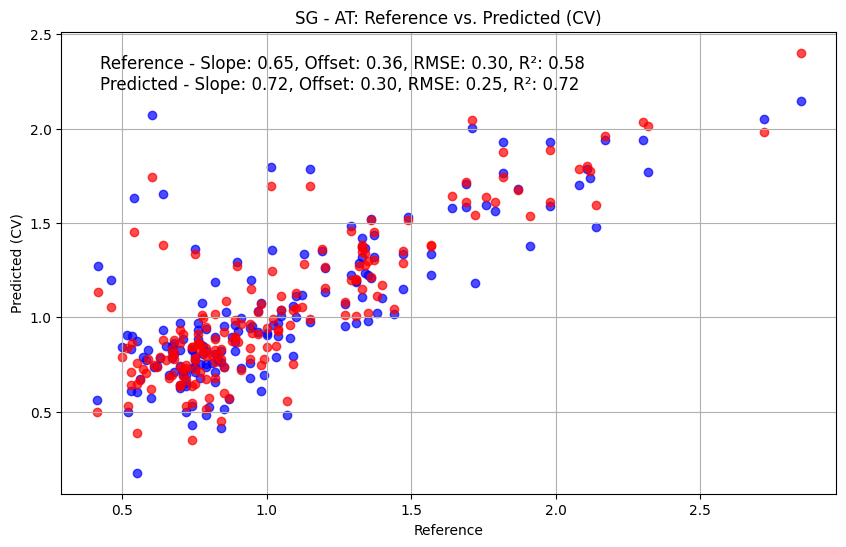

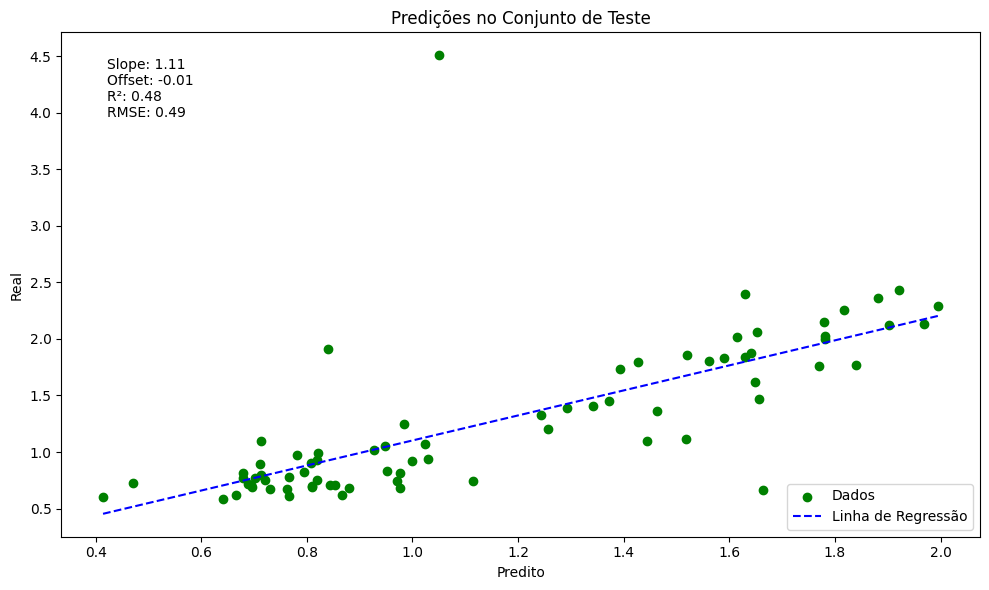

PLSR concluído e métricas salvas!


In [8]:
def run_plsr(filter_name):
    print(f"-------------------------------------> {filter_name} <-------------------------------------")
    global plot_infos_msc, plot_infos_snv, plot_infos_sg  
    
    calib_path = os.path.join(dataset_saved, f"{filter_name}_processed_calibracao.xlsx")
    valid_path = os.path.join(dataset_saved, f"{filter_name}_processed_validacao.xlsx")
    
    if not os.path.exists(calib_path) or not os.path.exists(valid_path):
        print(f"Arquivos para {filter_name} não encontrados!")
        return
    
    df_calib = pd.read_excel(calib_path)
    df_valid = pd.read_excel(valid_path)
    
    X_calib = df_calib.iloc[:, 6:].values
    X_valid = df_valid.iloc[:, 6:].values
    
    for attribute in target_variables:
        print(f"-------------------------------------> {filter_name} - {attribute} <-------------------------------------")
        Y_calib = df_calib[attribute].values
        Y_valid = df_valid[attribute].values
        
        # Determinar o número ideal de componentes para PLS
        n_components = jackknife_pls(X_calib, Y_calib)
        print(f"Número ótimo de componentes para {attribute}: {n_components}")
        
        kf = KFold(n_splits=5, shuffle=True, random_state=42)  
        pls = PLSRegression(n_components=n_components)
        Y_cv = cross_val_predict(pls, X_calib, Y_calib, cv=kf)
        
        pls.fit(X_calib, Y_calib)
        
        Y_pred_calib = pls.predict(X_calib).flatten()
        Y_pred_valid = pls.predict(X_valid).flatten()
        
        df_val = pd.DataFrame({
            'Y_valid': Y_valid,  
            'Y_pred_valid': Y_pred_valid  
        })
        
        metrics_df_cal = plot_pred_vs_ref(Y_calib, Y_pred_calib, Y_cv, attribute, filter_name)
        metrics_df_val = pred_plot(df_val)
        
        metrics_df = pd.concat([metrics_df_cal, metrics_df_val], ignore_index=True)
        
        if filter_name == "MSC":
            plot_infos_msc = add_plot_infos(plot_infos_msc, metrics_df, attribute)
        elif filter_name == "SNV":
            plot_infos_snv = add_plot_infos(plot_infos_snv, metrics_df, attribute)
        elif filter_name == "SG":
            plot_infos_sg = add_plot_infos(plot_infos_sg, metrics_df, attribute)

for filter_type in ["MSC", "SNV", "SG"]:
    run_plsr(filter_type)

plot_infos_msc.to_excel(os.path.join(dataset_save, "PLSR_metrics_MSC.xlsx"), index=False)
plot_infos_snv.to_excel(os.path.join(dataset_save, "PLSR_metrics_SNV.xlsx"), index=False)
plot_infos_sg.to_excel(os.path.join(dataset_save, "PLSR_metrics_SG.xlsx"), index=False)

print("PLSR concluído e métricas salvas!")